# Charging station project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings("ignore")
!pip install openpyxl
# !pip install --upgrade pip
from IPython.display import Image
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

     |████████████████████████████████| 242 kB 28.8 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


# Objectives
## Where potentially and geographically should we start a EV charging station business?

- Who are the customers?
- How to pricing their charging service?
- How do we predict if a customer is going to use our product?

## Variables
'Fuel Type Code':   
'Station Name':  
'Street Address':   
'Intersection Directions': removed   
'City':    
'State':    
'ZIP':   
'Station Phone': removed   
'Status Code': removed   
'Expected Date':      
'Groups With Access Code':   
'Access Days Time':   
'Cards Accepted': removed   
'EV Level1 EVSE Num': # of level 1 charger  
'EV Level2 EVSE Num': # of level 2 charger
'EV DC Fast Count': # of exrta-fast charger
'EV Other Info': removed  
'EV Network': brand of charger, combine duplicates 
'EV Network Web':   
'Geocode Status': removed   
'Latitude':    
'Longitude':        
'Date Last Confirmed': removed  
'ID': removed    
'Updated At': removed   
'Owner Type Code': removed  
'Federal Agency ID': removed  
'Federal Agency Name': removed  
'Open Date': removed      
'EV Connector Types': removed  
'Country':                       
'Groups With Access Code (French)': removed        
'Access Code': removed       
'Access Detail Code': removed      
'Federal Agency Code': removed     
'Facility Type': combine duplicates      
'EV Pricing':                 
'EV On-Site Renewable Source': removed        

## 1. Data Loading

In [3]:
data = pd.read_csv('ev_stations_v1.csv')
data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data.')

Shape of the data: (50289, 65)
There are 50289 rows and 65 columns in the data.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50289 entries, 0 to 50288
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    50289 non-null  object 
 1   Station Name                      50289 non-null  object 
 2   Street Address                    50256 non-null  object 
 3   Intersection Directions           2491 non-null   object 
 4   City                              50289 non-null  object 
 5   State                             50289 non-null  object 
 6   ZIP                               50289 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     47211 non-null  object 
 9   Status Code                       50289 non-null  object 
 10  Expected Date                     147 non-null    object 
 11  Groups With Access Code           50289 non-null  object 
 12  Acce

In [6]:
# 47830 unique station from 50289 station
data["Station Name"].unique()

In [7]:
data['Country'].unique()

In [8]:
data['Fuel Type Code'].unique()

In [9]:
data[['Groups With Access Code','Groups With Access Code (French)']].head(7)

,Groups With Access Code,Groups With Access Code (French)
0,Private,Privé
1,Private,Privé
2,Public,Public
3,Private,Privé
4,Private,Privé
5,Private - Government only,Privé - Réservé au gouvernement
6,Private,Privé


## 2. Data Processing

In [10]:
# Delete columns of dataframe if all NaN values
df = data.dropna(axis=1, how='all')
df.shape

(50289, 38)

In [11]:
# working station (1) vs unavailable station (0)
df['working'] = df['Groups With Access Code'].apply(lambda x: 0 if any([substring in x for substring in ['TEMPORARILY UNAVAILABLE', 'PLANNED']]) else 1)

In [12]:
# drop any unrelevant variables for analysis
df = df.drop(['Fuel Type Code','Intersection Directions','Station Phone','Status Code', 'Expected Date', 'Groups With Access Code',
        'Cards Accepted', 'EV Other Info', 'EV Network Web', 'Geocode Status', 'Date Last Confirmed', 'ID', 'Updated At', 
        'Owner Type Code','Federal Agency ID', 'Federal Agency Name', 'Open Date','Country','Groups With Access Code (French)',
        'Access Code', 'Access Detail Code', 'Federal Agency Code','EV On-Site Renewable Source'],1)
df.columns

Index(['Station Name', 'Street Address', 'City', 'State', 'ZIP',
       'Access Days Time', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Network', 'Latitude', 'Longitude',
       'EV Connector Types', 'Facility Type', 'EV Pricing', 'working'],
      dtype='object')

In [13]:
g = df.columns.to_series().groupby(data.dtypes).groups
dt = {k.name: v for k, v in g.items()}
dt

{'float64': Index(['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
        'Latitude', 'Longitude'],
       dtype='object'),
 'object': Index(['Station Name', 'Street Address', 'City', 'State', 'ZIP',
        'Access Days Time', 'EV Network', 'EV Connector Types', 'Facility Type',
        'EV Pricing'],
       dtype='object')}

In [14]:
df[dt["object"]].head()

,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,EV Connector Types,Facility Type,EV Pricing
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Fleet use only,Non-Networked,CHADEMO J1772 J1772COMBO,UTILITY,NaN
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,Non-Networked,J1772,UTILITY,Free
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,24 hours daily; pay lot,Non-Networked,J1772,PARKING_GARAGE,NaN
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,For fleet and employee use only,Non-Networked,CHADEMO J1772 J1772COMBO,UTILITY,NaN
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,Fleet use only,Non-Networked,CHADEMO J1772 J1772COMBO,UTILITY,NaN


In [15]:
# TODO simplify and seperate by groups for analysis 
## 24 hours --> all days
## hours --> business hours 
## start/end time 
## others
df['Access Days Time'].str.split(';',expand=True)[0].unique()

df['Access Days Time'] = df['Access Days Time'].str.split(';',expand=True)[0]

In [16]:
df['Facility Type'].unique()

In [17]:
# remove conventionally duplicate values
df['Facility Type'] = df['Facility Type'].replace(dict.fromkeys(['PAY_GARAGE', 'PAY_LOT', 'PARKING_LOT', 'FLEET_GARAGE'],'PARKING_GARAGE'))
df['Facility Type'] = df['Facility Type'].replace(dict.fromkeys(['NATL_PARK','RV_PARK'],'PARK'))
df['Facility Type'] = df['Facility Type'].replace('SHOPPING_MALL','SHOPPING_CENTER')

In [18]:
len(df['Facility Type'].unique())

54

In [19]:
# fix duplicate values
df['EV Pricing'] = df['EV Pricing'].replace('FREE', 'Free')

In [20]:
df['EV Pricing'].unique()

# Grouping
# per hour
# per session/charge
# per kWh

# TODO:
# Level 2 + DC Fast
# visualizations of on pricing for each group by other characteristics

In [22]:
df

,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,EV Connector Types,Facility Type,EV Pricing,working
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Fleet use only,NaN,39.0,3.0,Non-Networked,34.248319,-118.387971,CHADEMO J1772 J1772COMBO,UTILITY,NaN,1
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,NaN,4.0,NaN,Non-Networked,34.052542,-118.448504,J1772,UTILITY,Free,1
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,24 hours daily,NaN,12.0,NaN,Non-Networked,34.040539,-118.271387,J1772,PARKING_GARAGE,NaN,1
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,For fleet and employee use only,NaN,311.0,2.0,Non-Networked,34.059133,-118.248589,CHADEMO J1772 J1772COMBO,UTILITY,NaN,1
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,Fleet use only,NaN,19.0,1.0,Non-Networked,33.759802,-118.096665,CHADEMO J1772 J1772COMBO,UTILITY,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50284,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,24 hours daily,NaN,2.0,NaN,ChargePoint Network,38.684660,-120.065169,J1772,NaN,NaN,1
50285,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,24 hours daily,NaN,NaN,6.0,eVgo Network,36.801716,-121.664153,CHADEMO J1772COMBO,NaN,NaN,1
50286,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,24 hours daily,NaN,NaN,2.0,Greenlots,45.489030,-122.798151,CHADEMO J1772COMBO,NaN,NaN,1
50287,Shell - Inman,2040 Highway 292,Inman,SC,29349,24 hours daily,NaN,NaN,1.0,Greenlots,35.082476,-82.058433,CHADEMO J1772COMBO,NaN,NaN,1


In [44]:
# https://stackoverflow.com/questions/4703390/how-to-extract-a-floating-number-from-a-string
import re
df_pricing = df[df['EV Pricing'].notnull()]
df_pricing_hourly = df_pricing[df_pricing['EV Pricing'].str.contains('per hour')]
df_pricing_hourly = df_pricing_hourly[~df_pricing_hourly['EV Pricing'].str.contains('Level 2')]
df_pricing_hourly = df_pricing_hourly[["State","City", "EV Pricing"]]
df_pricing_hourly['price'] = df_pricing_hourly['EV Pricing'].str.split().apply(lambda x: float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)",str(x))[0]))

In [24]:
df_pricing_session = df_pricing[df_pricing['EV Pricing'].str.contains('per session')]
df_pricing_session = df_pricing_session[~df_pricing_session['EV Pricing'].str.contains('Level 2')]
df_pricing_session = df_pricing_session[["State","City", "EV Pricing"]]
df_pricing_session['price'] = df_pricing_session['EV Pricing'].str.split().apply(lambda x: float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)",str(x))[0]))

In [25]:
df_pricing_kWh = df_pricing[df_pricing['EV Pricing'].str.contains('per kWh')]
df_pricing_kWh = df_pricing_kWh[~df_pricing_kWh['EV Pricing'].str.contains('Level 2')]
df_pricing_kWh = df_pricing_kWh[["State","City", "EV Pricing"]]
df_pricing_kWh['price'] = df_pricing_kWh['EV Pricing'].str.split().apply(lambda x: float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)",str(x))[0]))

In [83]:
# TODO
df_pricing_level2 = df_pricing[df_pricing['EV Pricing'].str.contains('Level 2')]
temp = pd.DataFrame(df_pricing_level2["EV Pricing"].str.split(",",expand=True))
temp

,0,1
3933,Level 2: $4 per session or $19.99 for monthly ...,None
3934,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...
3935,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...
3936,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...
3937,DC Fast: $7.50 per session or $19.99 for month...,Level 2: $4 per session or $19.99 for monthly...
...,...,...
50206,Level 2: $0.3 per kWh,None
50235,Level 2: $0.29 per kWh,None
50236,Level 2: $0.49 per kWh,None
50237,Level 2: $0.49 per kWh,None


In [86]:
# temp['Level 2'] = np.nan
# temp['DC Fast'] = np.nan

for i in range(2):
    for idx, tx in zip(temp.index, temp[i]):
        if tx is not None:
            curr = tx.split(":")
            if len(curr) > 1:
                type = curr[0]
                value = curr[1]
                temp.loc[idx,type] = value
temp

,0,1,Level 2,DC Fast,DC Fast,Level 2
3933,Level 2: $4 per session or $19.99 for monthly ...,None,$4 per session or $19.99 for monthly plan,NaN,NaN,NaN
3934,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...,$4 per session or $19.99 for monthly plan,NaN,$7.50 per session or $19.99 for monthly plan,NaN
3935,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...,$4 per session or $19.99 for monthly plan,NaN,$7.50 per session or $19.99 for monthly plan,NaN
3936,Level 2: $4 per session or $19.99 for monthly ...,DC Fast: $7.50 per session or $19.99 for mont...,$4 per session or $19.99 for monthly plan,NaN,$7.50 per session or $19.99 for monthly plan,NaN
3937,DC Fast: $7.50 per session or $19.99 for month...,Level 2: $4 per session or $19.99 for monthly...,NaN,$7.50 per session or $19.99 for monthly plan,NaN,$4 per session or $19.99 for monthly plan
...,...,...,...,...,...,...
50206,Level 2: $0.3 per kWh,None,$0.3 per kWh,NaN,NaN,NaN
50235,Level 2: $0.29 per kWh,None,$0.29 per kWh,NaN,NaN,NaN
50236,Level 2: $0.49 per kWh,None,$0.49 per kWh,NaN,NaN,NaN
50237,Level 2: $0.49 per kWh,None,$0.49 per kWh,NaN,NaN,NaN


## 3. Exploratory Data Analysis

### Stations vs Vehicles
- Working charging stations by state 
- EV car owners by state
- Visualization

In [24]:
# https://towardsdatascience.com/state-name-to-state-abbreviation-crosswalks-6936250976c
# Get Crosswalk From Generic Website
# cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
# cw_filename = 'state_codes.html'
# states = pd.read_html(cw_location + cw_filename)[0]

# code_state_map = dict(zip(states['Code'],
#                           states['Description']))

# https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

df['State Name'] = df['State'].map(abbrev_to_us_state)

In [25]:
# https://worldpopulationreview.com/states
population = pd.read_csv("csvData.csv")
pop = population[["State", "Pop"]]
# pop.head()

In [26]:
df_pop = df.merge(pop, how='left', left_on='State Name', right_on='State').drop('State_y', axis=1)

In [27]:
# https://afdc.energy.gov/data/10962
ev_reg_pop = pd.read_excel("10962-ev-registration-counts-by-state_6-11-21.xlsx",sheet_name=0)
# ev_reg_pop.head()

In [28]:
df_pop = df_pop.merge(ev_reg_pop, how='left', left_on='State Name', right_on='State').drop('State', axis=1)

In [29]:
df_pop.columns

Index(['Station Name', 'Street Address', 'City', 'State_x', 'ZIP',
       'Access Days Time', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Network', 'Latitude', 'Longitude',
       'EV Connector Types', 'Facility Type', 'EV Pricing', 'working',
       'State Name', 'Pop', 'Registration Count'],
      dtype='object')

In [30]:
df_pop_filtered = df_pop[['State_x', 'State Name', 'City', 'ZIP', 'Latitude', 'Longitude', 'Station Name', 'EV Pricing', 'Pop', 'Registration Count', 'working']]
df_pop_working = df_pop_filtered[df_pop_filtered['working'] == 1].drop('working',axis=1)

In [31]:
df_pop_working['station_count'] = df_pop_working.groupby(['State Name'])['Station Name'].transform('nunique')
df_pop_working['ev_station_rate'] = df_pop_working['station_count'] / df_pop_working['Registration Count']
df_pop_working[['State Name','station_count','Registration Count','ev_station_rate']].drop_duplicates().sort_values('ev_station_rate')

,State Name,station_count,Registration Count,ev_station_rate
150,New Jersey,703.0,30420.0,0.023110
147,Arizona,870.0,28770.0,0.030240
0,California,14174.0,425300.0,0.033327
107,Washington,1711.0,50520.0,0.033868
503,Hawaii,369.0,10670.0,0.034583
121,Illinois,966.0,26000.0,0.037154
528,Nevada,440.0,11040.0,0.039855
108,Oregon,961.0,22850.0,0.042057
123,Texas,2202.0,52190.0,0.042192
131,Florida,2497.0,58160.0,0.042933


The state with a lower ev_station_rate may indicate a lack of EV stations compared to the number of EV vehicle holders registered in that state.

In [32]:
# visualization by USA
# export data
df_pop_working.to_csv('/data/notebook_files/df_pop_working.csv')

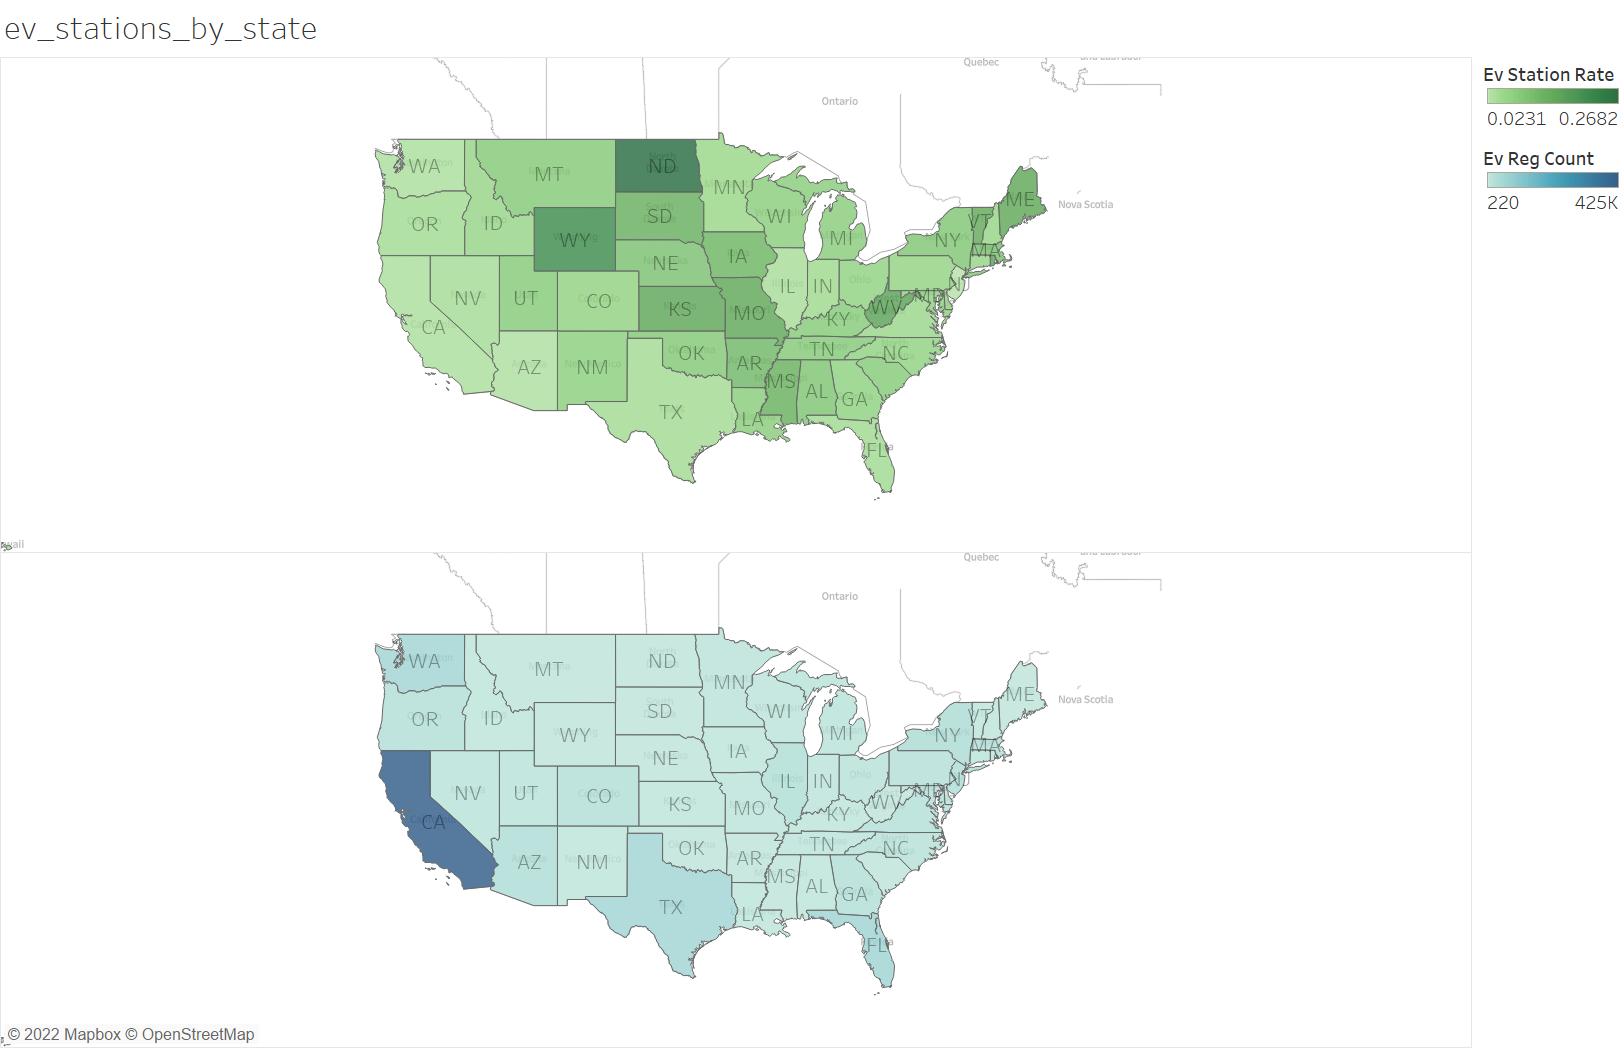

In [33]:
Image("ev_stations_by_state.png")

In [34]:
# visualization by CA
# df_ca = df_pop_working[(df_pop_working['State_x'] == 'CA')]
# df_ca = df_ca[~(df_ca['City'].isin(['Coffee Creek','Hope Valley','Crownsville']))]
# df_ca.to_csv('/data/notebook_files/df_ca.csv')

In [35]:
# visualization by TX
# df_tx = df_pop_working[(df_pop_working['State_x'] == 'TX')]
# df_tx.to_csv('/data/notebook_files/df_tx.csv')

### Station's Characteristics vs Pricing

- correlation?
- modeling and feature importance?

In [1]:
# variables may be helpful for pricing
# 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
# Categorical: 'Access Days Time', 'EV Network', 'EV Connector Types', 'Facility Type'

#### Level 1 Price

In [93]:
# hourly rate by state in USA
df_pricing_hourly.groupby("State Name")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
State Name,,,,,
Arizona,5,1.50,10.00,4.700000,1.500
Arkansas,1,0.25,0.25,0.250000,0.250
California,64,0.45,20.00,2.303125,1.000
Colorado,15,0.15,4.00,1.286667,1.000
Connecticut,4,1.00,5.00,2.625000,2.250
Georgia,3,1.00,3.00,1.666667,1.000
Hawaii,17,0.50,4.00,1.947059,2.000
Indiana,4,1.00,3.00,1.687500,1.375
Maine,5,1.00,3.00,2.300000,3.000


In [96]:
# hourly rate by city in CA
df_pricing_hourly[df_pricing_hourly["State Name"] == "California"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Arcadia,1,1.00,1.00,1.000,1.000
Auburn,1,0.50,0.50,0.500,0.500
Azusa,1,1.00,1.00,1.000,1.000
Camarillo,1,3.00,3.00,3.000,3.000
Canoga Park,1,1.00,1.00,1.000,1.000
Chatsworth,1,1.00,1.00,1.000,1.000
City of Industry,1,20.00,20.00,20.000,20.000
Danville,1,2.20,2.20,2.200,2.200
Duarte,1,1.00,1.00,1.000,1.000


In [97]:
# hourly rate by city in TX
df_pricing_hourly[df_pricing_hourly["State Name"] == "Texas"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Bedford,1,1.0,1.0,1.0,1.0
Fort Worth,4,1.0,3.0,1.5,1.0
Fredericksburg,1,2.0,2.0,2.0,2.0
Sherman,1,0.5,0.5,0.5,0.5


In [98]:
# session rate by state in USA
df_pricing_session.groupby("State Name")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
State Name,,,,,
Arkansas,1,15.00,15.0,15.000000,15.00
California,7,0.50,20.0,7.500000,5.00
Colorado,1,3.00,3.0,3.000000,3.00
Connecticut,1,3.00,3.0,3.000000,3.00
Florida,1,5.00,5.0,5.000000,5.00
Georgia,2,1.50,50.0,25.750000,25.75
Hawaii,5,6.00,15.0,9.000000,7.00
Indiana,5,1.00,7.0,5.800000,7.00
Louisiana,1,2.00,2.0,2.000000,2.00


In [99]:
# session rate by city in CA
df_pricing_session[df_pricing_session["State Name"] == "California"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Fremont,1,0.5,0.5,0.5,0.5
Gustine,1,20.0,20.0,20.0,20.0
Oakhurst,1,5.0,5.0,5.0,5.0
San Francisco,2,5.0,7.0,6.0,6.0
Torrance,1,5.0,5.0,5.0,5.0
Ukiah,1,10.0,10.0,10.0,10.0


In [100]:
# session rate by city in TX
df_pricing_session[df_pricing_session["State Name"] == "Texas"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Bastrop,1,10.0,10.0,10.0,10.0


In [101]:
# per kWh rate by state in USA
df_pricing_kWh.groupby("State Name")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
State Name,,,,,
Alabama,9,0.13,0.28,0.263333,0.28
Alaska,1,0.46,0.46,0.460000,0.46
Arizona,28,0.13,0.29,0.269643,0.28
Arkansas,5,0.28,0.28,0.280000,0.28
California,367,0.00,1.00,0.265995,0.28
Colorado,35,0.11,0.28,0.252571,0.28
Connecticut,25,0.28,0.28,0.280000,0.28
Delaware,8,0.28,0.28,0.280000,0.28
District of Columbia,4,0.12,0.30,0.245000,0.28


In [102]:
# per kWh rate by city in CA
df_pricing_kWh[df_pricing_kWh["State Name"] == "California"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Alameda,1,0.28,0.28,0.28,0.28
Alhambra,1,0.30,0.30,0.30,0.30
Alturas,1,0.28,0.28,0.28,0.28
Anaheim,2,0.28,0.28,0.28,0.28
Antioch,1,0.28,0.28,0.28,0.28
...,...,...,...,...,...
Williams,1,0.28,0.28,0.28,0.28
Woodland,1,0.28,0.28,0.28,0.28
Yermo,1,0.28,0.28,0.28,0.28


In [103]:
# per kWh rate by city in TX
df_pricing_kWh[df_pricing_kWh["State Name"] == "Texas"].groupby("City")["price"].agg(["count","min","max","mean","median"])

,count,min,max,mean,median
City,,,,,
Alvarado,1,0.28,0.28,0.280,0.280
Amarillo,1,0.28,0.28,0.280,0.280
Arlington,1,0.28,0.28,0.280,0.280
Austin,3,0.28,0.28,0.280,0.280
Bellmead,1,0.28,0.28,0.280,0.280
Brownsville,1,0.28,0.28,0.280,0.280
Centerville,1,0.28,0.28,0.280,0.280
Channelview,1,0.28,0.28,0.280,0.280
Childress,1,0.28,0.28,0.280,0.280


#### Level 2

#### DC Fast

- Survey online: https://www.esource.com/429201ebtf/ev-charging-and-pricing-what-are-consumers-willing-pay
1. Accurate communications about battery life and degradation will be paramount as more people adopt this new technology.

We surveyed respondents on their willingness to pay for different home and public charging options. 

**For public Level 2 charging**, we gave options for different prices per hour of charge, assuming a 6.6 kW charger. We asked respondents what the highest price they would pay for a public charger was, assuming they had a Level 2 charger at home that cost \\$0.75 per hour to use. Most EV owners were willing to pay up to \\$3 per hour (figure 2). Those considering an EV were more sensitive about the price. More than half said they would pay no more than \\$0.75 or \\$1.00 per hour, and only 5% said they’d pay \\$4.00 per hour.

**Fast charging or Level 3**. We then asked about fast charging and their willingness to pay for the added speed, which we said fully changed most cars in 30 to 60 minutes. Without considering the extra cost, about 24% of EV owners or those considering an EV said they would use a fast charger every time they could, 59% would use it when convenient, and 15% would use it in an emergency.

Then we told them about the possibility of battery degradation when frequently using fast chargers. This simple addition dramatically shifted people’s stated frequency of use. Only 33% said they’d use it when convenient (down from 59%) and 45% said they’d only use it in an emergency (up from 15%). Accurate communications about battery life and degradation will be paramount as more people adopt this new technology.

We then asked, “If you were using a public charger and had the choice between Level 2 and Level 3 fast charging, what was the most you would be willing to pay to use the fast charger?” Just over 40% of respondents said they’d only pay the same as the Level 2 (figure 3). On the other end of the spectrum, only 4% said they’d pay twice as much and 1% said they’d pay four times as much. This data could influence utility rates as well as private charging network companies who will have to pay significant demand charges and installation prices.

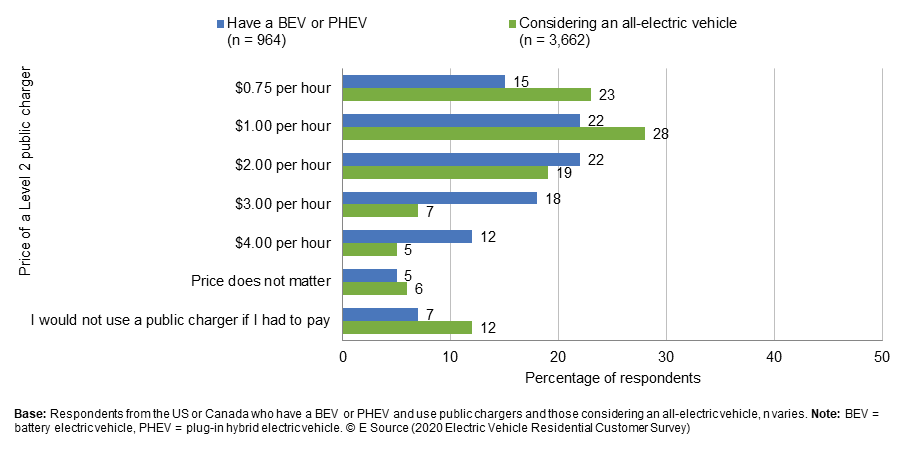

In [37]:
Image(filename = "bill_evblog_3_figure2_1.png")